In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError 
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import CategoricalAccuracy
import tensorflow as tf





In [30]:
#df = pd.read_csv('AllWeather.csv', index_col='sno')
df = pd.read_csv('finals.csv', index_col='sno')
##To plot sample data
#print(df.head())
#df.plot(figsize=(10, 5))
#####
#print(df[:25])
df

,station name,station number,Date,Hour,Temp,dew point,humidity,precipitation,snow depth,wind direction,wind speed,peak wind gust,air pressure,one hour sunshine total(minutes),weather condition code
sno,,,,,,,,,,,,,,,
1,gulmarg,42026,01-01-2023,0,-2.9,-28.4,12,0.0,0,202,5.4,0,1021.2,0,3
2,gulmarg,42026,01-01-2023,1,-2.8,-26.7,14,0.0,0,204,5.4,0,1021.1,0,1
3,gulmarg,42026,01-01-2023,2,-2.8,-25.2,16,0.0,0,205,4.7,0,1021.3,0,1
4,gulmarg,42026,01-01-2023,3,-7.4,-10.7,77,0.0,0,0,0.0,0,981.5,0,1
5,gulmarg,42026,01-01-2023,4,-2.6,-24.4,17,0.0,0,204,4.7,0,1022.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315356,bhubaneswar,42971,31-12-2023,19,17.0,15.0,88,0.0,0,0,0.0,0,1017.0,0,5
315357,bhubaneswar,42971,31-12-2023,20,16.0,15.0,94,0.0,0,280,3.6,0,1016.0,0,5
315358,bhubaneswar,42971,31-12-2023,21,18.0,16.7,92,0.0,0,0,0.0,0,1015.5,0,5


<Axes: xlabel='sno'>

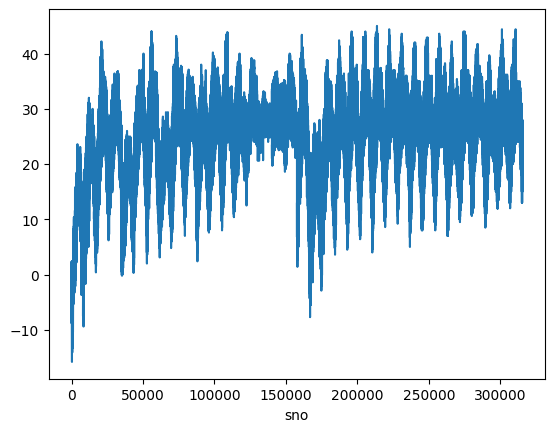

In [31]:
#Plotting Temp Values
temp = df['Temp']
temp.plot()
#plt.show()
#######

#[[[1],[2],[3],[4],[5]]] [6] we give 1 to 5 hours and we get 6th hour value
# [[2,3,4,5,6]] [7] we give 2 to 6 hours and we get 7th hour value
# [[3,4,5,6,7]] [8] we give 3 to 7 hours and we get 8th hour value 
#We predict the next value based on the previous 5 values

#Supervoised learning



In [53]:
def dt_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i + window_size]]
        X.append(row)
        label = df_as_np[i + window_size]
        y.append(label)
    return np.array(X), np.array(y)

WINDOW_SIZE = 12
X, y = dt_to_X_y(temp, window_size=WINDOW_SIZE)
print(X.shape, y.shape)
#print(X[:5])
#print(y[:5])
print(len(X)*.8, len(y)*.1)
X_train, y_train = X[:int(len(X)*0.8)], y[:int(len(y)*0.8)]
X_val, y_val = X[int(len(X)*0.8):int(len(X)*0.9)], y[int(len(y)*0.8):int(len(y)*0.9)]
X_test, y_test = X[int(len(X)*0.9):], y[int(len(y)*0.9):]

#Print all shapes
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape) 
print(X_test.shape, y_test.shape)
#All  shape printed




(315348, 12, 1) (315348,)
252278.40000000002 31534.800000000003
(252278, 12, 1) (252278,)
(31535, 12, 1) (31535,)
(31535, 12, 1) (31535,)


In [ ]:

###MOdel

model1 = Sequential()
model1.add(InputLayer(input_shape=(WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))

model1.summary()

#Model Cleckpoint

cp = ModelCheckpoint('modellstm/', save_best_only=True)

model1.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

history = model1.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[cp])

#history = model1.fit(X_train, y_train, epochs=10, batch_size=32,  callbacks=[cp])

score = model1.evaluate(X_test, y_test)


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 64)                16896     
                                                                 
 dense_28 (Dense)            (None, 8)                 520       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7883/7884 [============================>.] - ETA: 0s - loss: 9.5753 - root_mean_squared_error: 3.0944WARNING:tensorflow:Can save best model only with val_loss available, skipping.


7884/7884 [==============================] - 220s 28ms/step - loss: 9.5746 - root_mean_squared_error: 3.0943
Epoch 2/10
7884/7884 [==============================] - ETA: 0s - loss: 1.8958 - root_mean_squared_error: 1.3769WARNING:tensorflow:Can save best model only with val_loss available, skipping.


7884/7884 [==============================] - 209s 26ms/step - loss: 1.8958 - root_mean_squared_error: 1.3769
Epoch 3/10
7883/7884 [============================>.] - ETA: 0s - loss: 1.8238 - root_mean_squared_error: 1.3505WARNING:tensorflow:Can save best model only with val_loss available, skipping.


7884/7884 [==============================] - 208s 26ms/step - loss: 1.8238 - root_mean_squared_error: 1.3505
Epoch 4/10
7884/7884 [==============================] - ETA: 0s - loss: 1.7736 - root_mean_squared_error: 1.3318WARNING:tensorflow:Can save best model only with val_loss available, skipping.


7884/7884 [==============================] - 214s 27ms/step - loss: 1.7736 - root_mean_squared_error: 1.3318
Epoch 5/10
7884/7884 [==============================] - ETA: 0s - loss: 1.7365 - root_mean_squared_error: 1.3178WARNING:tensorflow:Can save best model only with val_loss available, skipping.


7884/7884 [==============================] - 223s 28ms/step - loss: 1.7365 - root_mean_squared_error: 1.3178
Epoch 6/10
7883/7884 [============================>.] - ETA: 0s - loss: 1.7053 - root_mean_squared_error: 1.3059WARNING:tensorflow:Can save best model only with val_loss available, skipping.


7884/7884 [==============================] - 233s 29ms/step - loss: 1.7052 - root_mean_squared_error: 1.3059
Epoch 7/10
7884/7884 [==============================] - ETA: 0s - loss: 1.6860 - root_mean_squared_error: 1.2985WARNING:tensorflow:Can save best model only with val_loss available, skipping.


7884/7884 [==============================] - 231s 29ms/step - loss: 1.6860 - root_mean_squared_error: 1.2985
Epoch 8/10
7884/7884 [==============================] - ETA: 0s - loss: 1.6643 - root_mean_squared_error: 1.2901WARNING:tensorflow:Can save best model only with val_loss available, skipping.


7884/7884 [==============================] - 240s 30ms/step - loss: 1.6643 - root_mean_squared_error: 1.2901
Epoch 9/10
7884/7884 [==============================] - ETA: 0s - loss: 1.6480 - root_mean_squared_error: 1.2838WARNING:tensorflow:Can save best model only with val_loss available, skipping.


7884/7884 [==============================] - 243s 31ms/step - loss: 1.6480 - root_mean_squared_error: 1.2838
Epoch 10/10
7884/7884 [==============================] - ETA: 0s - loss: 1.6361 - root_mean_squared_error: 1.2791WARNING:tensorflow:Can save best model only with val_loss available, skipping.


986/986 [==============================] - 11s 10ms/step - loss: 1.3687 - root_mean_squared_error: 1.1699


In [36]:
print("Test Score= ", score[0])
print("Test Accuracy= ", score[1])
##Loading the model

model1 = load_model('modellstm/')

train_prdictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Prediction': train_prdictions, 'Actuals': y_train})
print(train_results)

plt.plot(train_results['Train Prediction'][:10])
plt.plot(train_results['Actuals'][:10]) 
plt.show()

Test Score=  1.36874258518219
Test Accuracy=  1.1699327230453491


OSError: No file or directory found at modellstm/

In [38]:

model2 = Sequential()
model2.add(InputLayer(input_shape=(WINDOW_SIZE, 1)))
model2.add(Conv1D(64, kernel_size=3))
model2.add(Flatten()) 
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.summary()

#Model Cleckpoint

cp1 = ModelCheckpoint('modelconv/', save_best_only=True)

model1.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

history = model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[cp1])

#history = model1.fit(X_train, y_train, epochs=10, batch_size=32,  callbacks=[cp])

score = model1.evaluate(X_test, y_test)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 10, 64)            256       
                                                                 


 flatten_4 (Flatten)         (None, 640)               0         
                                                                 
 dense_32 (Dense)            (None, 8)                 5128      
                                                                 
 dense_33 (Dense)            (None, 1)                 9         
                                                                 
Total params: 5,393
Trainable params: 5,393
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7882/7884 [============================>.] - ETA: 0s - loss: 1.6243 - root_mean_squared_error: 1.2745

INFO:tensorflow:Assets written to: modelconv\assets


INFO:tensorflow:Assets written to: modelconv\assets


7884/7884 [==============================] - 179s 22ms/step - loss: 1.6242 - root_mean_squared_error: 1.2745 - val_loss: 1.6770 - val_root_mean_squared_error: 1.2950
Epoch 2/10
7884/7884 [==============================] - 245s 31ms/step - loss: 1.6114 - root_mean_squared_error: 1.2694 - val_loss: 1.6897 - val_root_mean_squared_error: 1.2999
Epoch 3/10
7883/7884 [============================>.] - ETA: 0s - loss: 1.5958 - root_mean_squared_error: 1.2632

INFO:tensorflow:Assets written to: modelconv\assets


INFO:tensorflow:Assets written to: modelconv\assets


7884/7884 [==============================] - 222s 28ms/step - loss: 1.5957 - root_mean_squared_error: 1.2632 - val_loss: 1.6742 - val_root_mean_squared_error: 1.2939
Epoch 4/10
7884/7884 [==============================] - 225s 29ms/step - loss: 1.5868 - root_mean_squared_error: 1.2597 - val_loss: 1.7588 - val_root_mean_squared_error: 1.3262
Epoch 5/10
7884/7884 [==============================] - 241s 31ms/step - loss: 1.5747 - root_mean_squared_error: 1.2549 - val_loss: 1.7396 - val_root_mean_squared_error: 1.3189
Epoch 6/10
7884/7884 [==============================] - 246s 31ms/step - loss: 1.5654 - root_mean_squared_error: 1.2512 - val_loss: 1.7141 - val_root_mean_squared_error: 1.3092
Epoch 7/10
7884/7884 [==============================] - 260s 33ms/step - loss: 1.5564 - root_mean_squared_error: 1.2476 - val_loss: 1.8213 - val_root_mean_squared_error: 1.3496
Epoch 8/10
7884/7884 [==============================] - ETA: 0s - loss: 1.5488 - root_mean_squared_error: 1.2445

INFO:tensorflow:Assets written to: modelconv\assets


INFO:tensorflow:Assets written to: modelconv\assets


7884/7884 [==============================] - 267s 34ms/step - loss: 1.5488 - root_mean_squared_error: 1.2445 - val_loss: 1.6634 - val_root_mean_squared_error: 1.2897
Epoch 9/10
7884/7884 [==============================] - 232s 29ms/step - loss: 1.5396 - root_mean_squared_error: 1.2408 - val_loss: 1.6717 - val_root_mean_squared_error: 1.2929
Epoch 10/10
986/986 [==============================] - 11s 11ms/step - loss: 1.2802 - root_mean_squared_error: 1.1315


Test Score=  1.2802376747131348
Test Accuracy=  1.1314759254455566
7884/7884 [==============================] - 86s 11ms/step
        Train Prediction  Actuals
0              -2.940831     -6.4
1              -4.856314     -4.2
2              -5.379978     -4.1
3              -4.795572     -4.0
4              -4.393677     -4.0
...                  ...      ...
252273         20.427317     20.1
252274         20.395933     20.2
252275         20.576254     20.0
252276         20.702597     19.4
252277         19.702503     20.3

[252278 rows x 2 columns]


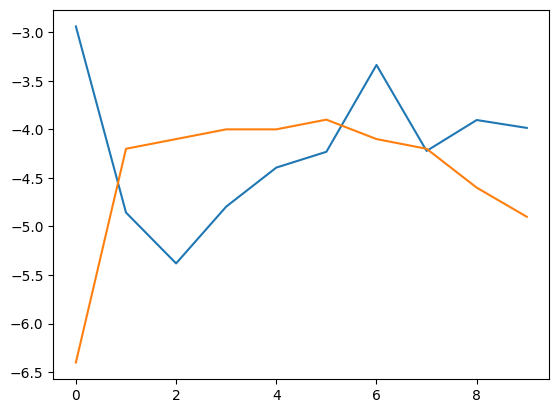

In [ ]:
print("Test Score= ", score[0])
print("Test Accuracy= ", score[1])
##Loading the model

model1 = load_model('modelconv/')



7884/7884 [==============================] - 90s 11ms/step
        Train Prediction  Actuals
0              -2.940831     -6.4
1              -4.856314     -4.2
2              -5.379978     -4.1
3              -4.795572     -4.0
4              -4.393677     -4.0
...                  ...      ...
252273         20.427317     20.1
252274         20.395933     20.2
252275         20.576254     20.0
252276         20.702597     19.4
252277         19.702503     20.3

[252278 rows x 2 columns]


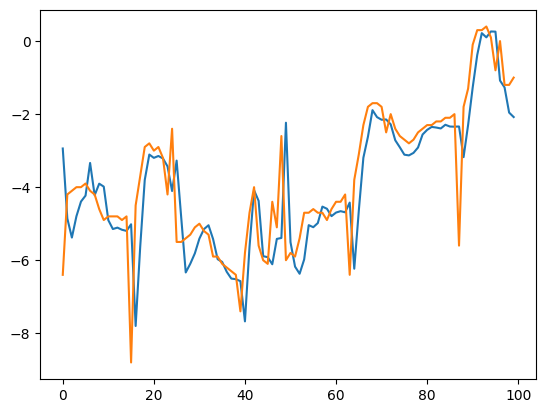

In [41]:
train_prdictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Prediction': train_prdictions, 'Actuals': y_train})
print(train_results)

plt.plot(train_results['Train Prediction'][:100])
plt.plot(train_results['Actuals'][:100]) 
plt.show()

  1/986 [..............................] - ETA: 26s

986/986 [==============================] - 10s 11ms/step
       Val Prediction  Actuals
0           21.488211     22.8
1           25.503996     22.0
2           26.288731     27.1
3           29.056267     28.2
4           28.855059     29.0
...               ...      ...
31530       28.290762     28.3
31531       28.072672     26.6
31532       27.625141     27.2
31533       27.900686     26.4
31534       25.822090     26.4

[31535 rows x 2 columns]


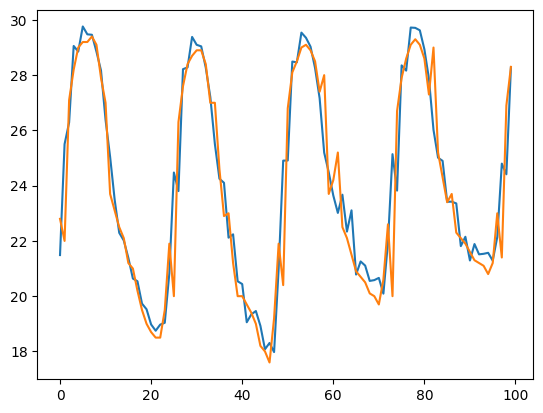

In [43]:
val_prdictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Prediction': val_prdictions, 'Actuals': y_val})
print(val_results)
plt.plot(val_results['Val Prediction'][:100])
plt.plot(val_results['Actuals'][:100]) 
plt.show()

In [52]:
X_testeed =[28,32,32,21,25,28,32,32,21,25,28,31] #12 Values
X_testeed = np.array(X_test).reshape(1, 12, 1) #Reshape to 3D array
prediction = model1.predict(X_testeed).flatten()
print("Prediction: ", prediction) ##Print prediction value

1/1 [==============================] - 0s 29ms/step
Prediction:  [30.81035]


986/986 [==============================] - 11s 11ms/step
       Test Prediction  Actuals
0            27.276930     27.3
1            27.387377     29.6
2            29.707579     30.2
3            31.376215     33.3
4            34.774117     34.7
...                ...      ...
31530        17.187222     17.0
31531        16.944149     16.0
31532        17.268621     18.0
31533        16.006149     16.0
31534        16.070875     16.0

[31535 rows x 2 columns]


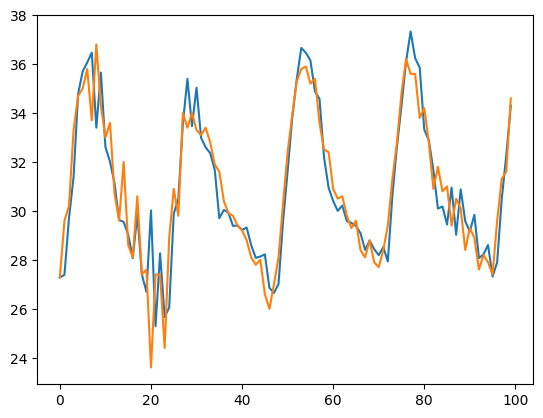

In [44]:
test_prdictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Prediction': test_prdictions, 'Actuals': y_test})

print(test_results)
plt.plot(test_results['Test Prediction'][:100])
plt.plot(test_results['Actuals'][:100]) 
plt.show()

#MSE and PLot


In [67]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y ,start, end):
    #predictions = model.predict(X[start:end]).flatten()# Only predict on the first 100 samples
    predictions = model.predict(X).flatten() #predict all samples
    df = pd.DataFrame(data={'Predictions': predictions, 'Actuals': y})
    
    plt.figure(figsize=(10, 5))
    plt.plot(df["Actuals"][start:end], label='True Values', color= 'blue')
    plt.plot(df["Predictions"][start:end], label='Predictions', color='red')
    plt.title(f"Test Predictions vs Actuals")
    plt.xlabel('Time Steps')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

    return df, mse(y, predictions)

986/986 [==============================] - 13s 14ms/step


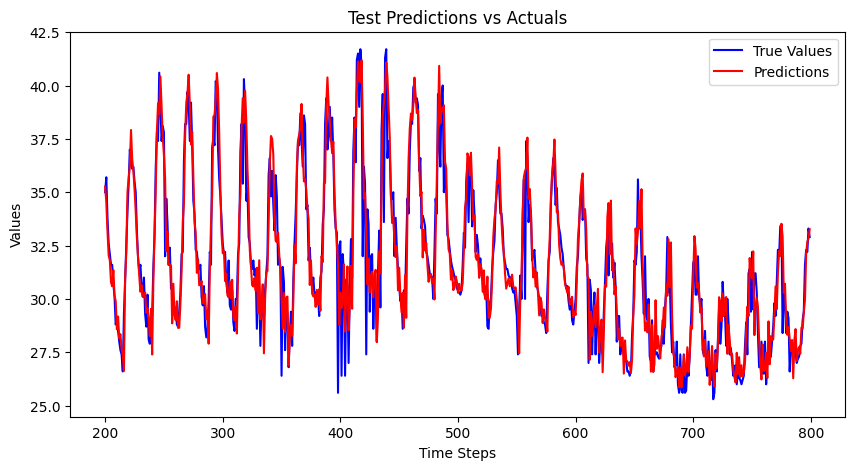

(       Predictions  Actuals
 0        27.276930     27.3
 1        27.387377     29.6
 2        29.707579     30.2
 3        31.376215     33.3
 4        34.774117     34.7
 ...            ...      ...
 31530    17.187222     17.0
 31531    16.944149     16.0
 31532    17.268621     18.0
 31533    16.006149     16.0
 31534    16.070875     16.0
 
 [31535 rows x 2 columns],
 1.264802387105935)

In [68]:
plot_predictions1(model1, X_test, y_test, 200, 800)